In [48]:
import os
import re
import math
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

In [49]:
with open('./env/settings.json') as f:
  path_file=json.load(f)

TRAIN_DIR_PATH = path_file['TRAIN_DIR']
TEST_DIR_PATH = path_file['TEST_DIR']
PROCESSED_DATA_DIR = path_file['PROCESSED_DATA_DIR']

In [50]:
TARGET_COL = '取引価格（総額）_log'

In [51]:
def ReadRawData(path):
    file_name_list=np.sort(os.listdir(path))
    df=pd.DataFrame([])
    for file_name in file_name_list:
        df=pd.concat([df,pd.read_csv(path+"/"+file_name)])
    df=df.reset_index(drop=True)
    return df

In [53]:
print("read data")
train_df = ReadRawData(TRAIN_DIR_PATH)
test_df = pd.read_csv(TEST_DIR_PATH)

read data


C:\Users\yuji_\AppData\Local\Temp\ipykernel_7304\3055248592.py:5: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.concat([df,pd.read_csv(path+"/"+file_name)])
C:\Users\yuji_\AppData\Local\Temp\ipykernel_7304\3055248592.py:5: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.concat([df,pd.read_csv(path+"/"+file_name)])


In [54]:
print(train_df.shape)
print(test_df.shape)

(637351, 28)
(19466, 27)


In [55]:
dtypes = []
val_counts_train = []
val_counts_test = []
isnull_train = []
isnull_test = []
isnull_train_series = 100 * train_df.isnull().sum() / len(train_df)
isnull_test_series = 100 * test_df.isnull().sum() / len(test_df)

In [56]:
for col in test_df.columns:
  dtypes.append(str(test_df[col].dtype))
  val_counts_train.append(len(train_df[col].value_counts()))
  val_counts_test.append(len(test_df[col].value_counts()))
  isnull_train.append(isnull_train_series[col])
  isnull_test.append(isnull_test_series[col])

In [57]:
inds = ["型", "unique_train", "unique_test", "NaN率_train", "NaN率_test"]
df_summary = pd.DataFrame([dtypes, val_counts_train, val_counts_test, isnull_train, isnull_test], columns=test_df.columns, index=inds).T
df_summary

,型,unique_train,unique_test,NaN率_train,NaN率_test
ID,int64,637351,19466,0.0,0.0
種類,object,1,1,0.0,0.0
地域,float64,0,0,100.0,100.0
市区町村コード,int64,618,526,0.0,0.0
都道府県名,object,47,47,0.0,0.0
市区町村名,object,618,526,0.0,0.0
地区名,object,12046,5515,0.045658,0.015411
最寄駅：名称,object,3831,2550,0.41092,0.066783
最寄駅：距離（分）,object,34,34,3.615747,0.066783
間取り,object,63,27,3.411307,4.736464


In [58]:
train_df["isTest"] = 0
test_df["isTest"] = 1
all_df = pd.concat([train_df,test_df])

In [59]:
all_df.head(2)

,ID,種類,地域,市区町村コード,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,...,前面道路：種類,前面道路：幅員（ｍ）,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引の事情等,取引価格（総額）_log,isTest
0,1060685,中古マンション等,NaN,1108,北海道,札幌市厚別区,大谷地東,大谷地,8,３ＬＤＫ,...,NaN,NaN,準工業地域,60.0,200.0,2009年第４四半期,未改装,NaN,7.079181,0
1,1005580,中古マンション等,NaN,1101,北海道,札幌市中央区,南９条西,中島公園,5,１ＤＫ,...,NaN,NaN,近隣商業地域,80.0,300.0,2018年第３四半期,未改装,NaN,6.755875,0


In [60]:
all_df['最寄駅：距離（分）'].value_counts()

最寄駅：距離（分）
6          52561
4          50589
5          46920
8          45732
3          44411
9          39612
7          33410
30分?60分    32805
10         32595
11         31570
2          28027
13         23552
1          20376
14         19322
15         19107
12         15580
16         14779
18         12011
19         10831
20          9156
21          7365
23          6844
25          6328
24          5049
28          4248
26          4097
0           3826
1H?1H30     3717
29          3690
17          2567
22          1101
2H?          856
1H30?2H      707
27           418
Name: count, dtype: int64

In [61]:
all_df['最寄駅：距離（分）'] = all_df['最寄駅：距離（分）'].replace({"30分?60分":45,"1H?1H30":75,"2H?":120,"1H30?2H":105}).astype(float)

In [62]:
all_df['建築年'].value_counts()

建築年
平成20年    22579
平成3年     22565
平成18年    22329
平成19年    22045
平成10年    21280
         ...  
昭和31年        5
昭和23年        5
昭和26年        4
昭和32年        3
昭和30年        2
Name: count, Length: 76, dtype: int64

In [65]:
wa2se_list = {}
for i in all_df['建築年'].value_counts().keys():
  if "令和" in i:
    num = float(i.split("令和")[1].split("年")[0])
    year = 2018 + num
  elif "平成" in i:
    num = float(i.split("平成")[1].split("年")[0])
    year = 1988 + num
  elif "昭和" in i:
    num = float(i.split("昭和")[1].split("年")[0])
    year = 1925 + num
  wa2se_list[i] = year

In [66]:
all_df['建築年'] = all_df['建築年'].replace(wa2se_list)

In [67]:
all_df['建築年']

0        1995.0
1        1982.0
2        1991.0
3        2015.0
4        1982.0
          ...  
19461    2019.0
19462    1998.0
19463    2000.0
19464    2019.0
19465    2015.0
Name: 建築年, Length: 656817, dtype: float64

In [68]:
print(all_df['面積（㎡）'].value_counts())

面積（㎡）
70     72873
65     67489
60     53712
75     49006
20     42805
       ...  
780        1
660        1
720        1
510        1
570        1
Name: count, Length: 195, dtype: int64


In [69]:
all_df['面積（㎡）'] = all_df['面積（㎡）'].replace({"2000㎡以上":2000})
all_df['面積（㎡）'] = all_df['面積（㎡）'].astype(float)

In [70]:
df_summary[(df_summary["NaN率_train"]>0.00001)]

,型,unique_train,unique_test,NaN率_train,NaN率_test
地域,float64,0,0,100.0,100.0
地区名,object,12046,5515,0.045658,0.015411
最寄駅：名称,object,3831,2550,0.41092,0.066783
最寄駅：距離（分）,object,34,34,3.615747,0.066783
間取り,object,63,27,3.411307,4.736464
土地の形状,float64,0,0,100.0,100.0
間口,float64,0,0,100.0,100.0
延床面積（㎡）,float64,0,0,100.0,100.0
建築年,object,76,59,2.860904,3.400801
建物の構造,object,12,8,2.185295,6.49851


In [71]:
del_cols = df_summary[(df_summary['unique_train']==1) | (df_summary['NaN率_train']>75)].index.values.tolist()
all_df = all_df.drop(del_cols,axis=1)

In [72]:
quantitative = [f for f in all_df.columns if all_df.dtypes[f] != 'object']
quantitative.remove('ID')
quantitative.remove('isTest')

print("~~~~~~~ 数字の列 ~~~~~~~")
print(quantitative)

qualitative = [f for f in all_df.columns if all_df.dtypes[f] == 'object']

print("~~~~~~~ 文字列型の列 ~~~~~~~")
print(qualitative)

~~~~~~~ 数字の列 ~~~~~~~
['市区町村コード', '最寄駅：距離（分）', '面積（㎡）', '建築年', '建ぺい率（％）', '容積率（％）', '取引価格（総額）_log']
~~~~~~~ 文字列型の列 ~~~~~~~
['都道府県名', '市区町村名', '地区名', '最寄駅：名称', '間取り', '建物の構造', '用途', '今後の利用目的', '都市計画', '取引時点', '改装']


In [73]:
all_df.describe()

,ID,市区町村コード,最寄駅：距離（分）,面積（㎡）,建築年,建ぺい率（％）,容積率（％）,取引価格（総額）_log,isTest
count,6.568170e+05,656817.000000,633759.000000,656817.000000,637921.000000,633893.000000,633893.000000,637351.000000,656817.000000
mean,1.847857e+07,18514.986046,11.705222,58.607390,1995.115195,67.623447,301.903981,7.217424,0.029637
std,9.566279e+06,9592.863791,12.175961,26.717929,11.479656,10.404475,148.211553,0.353935,0.169584
min,1.000000e+06,1101.000000,0.000000,10.000000,1946.000000,30.000000,50.000000,2.653213,0.000000
25%,1.306371e+07,13107.000000,5.000000,45.000000,1987.000000,60.000000,200.000000,7.000000,0.000000
50%,1.402798e+07,14104.000000,8.000000,65.000000,1996.000000,60.000000,200.000000,7.255273,0.000000
75%,2.703184e+07,27114.000000,14.000000,75.000000,2004.000000,80.000000,400.000000,7.447158,0.000000
max,4.703203e+07,47213.000000,120.000000,2000.000000,2020.000000,80.000000,1300.000000,9.934498,1.000000


In [74]:
from tqdm import tqdm

100%|██████████| 7/7 [00:02<00:00,  2.61it/s]


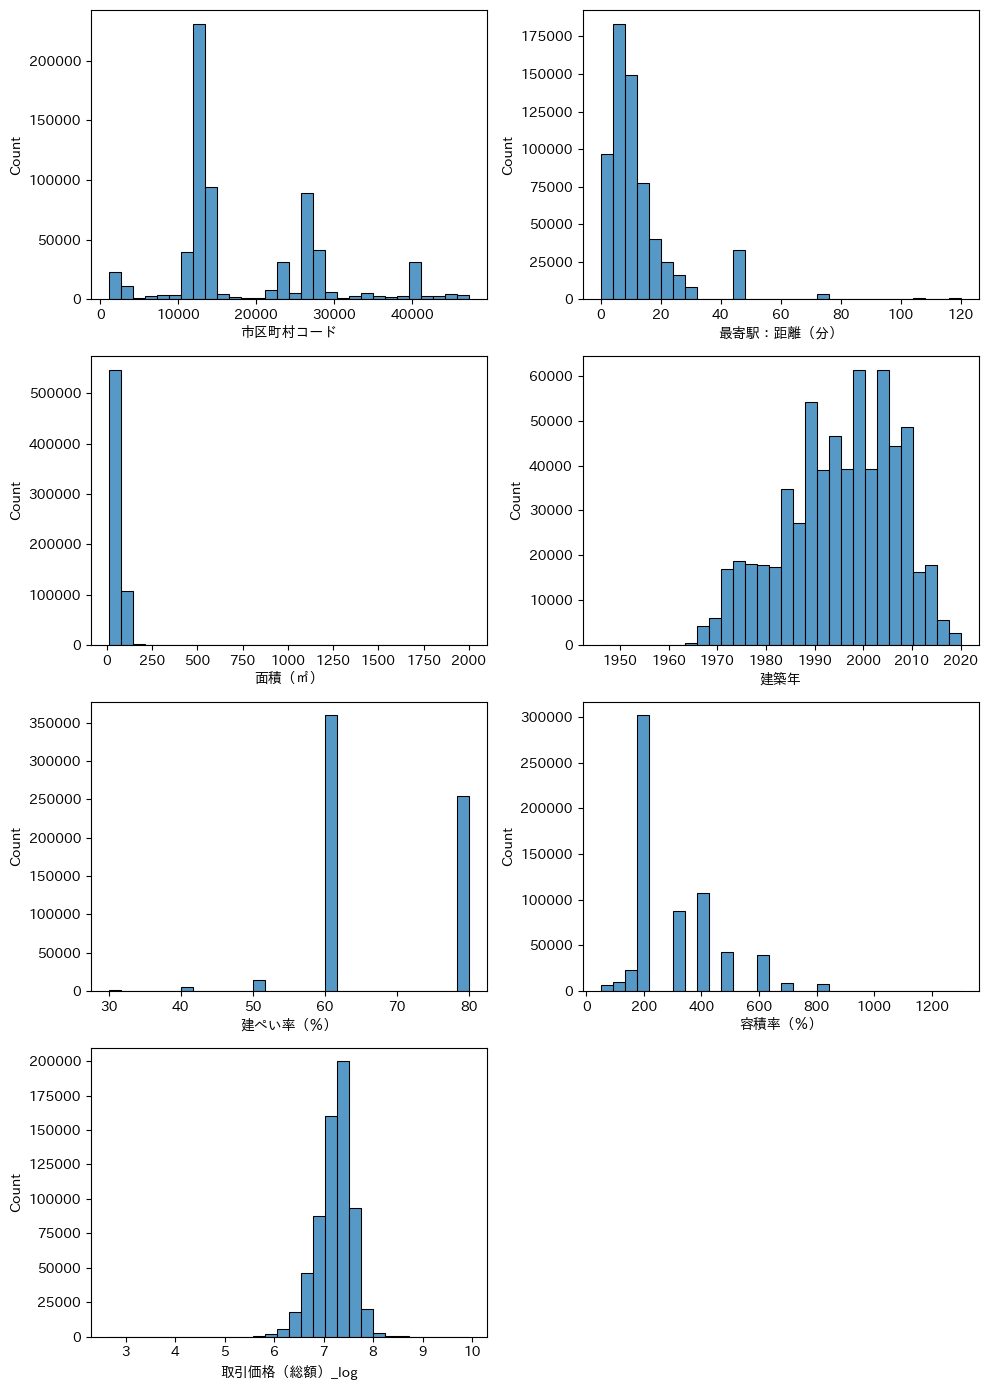

In [75]:
plt.figure(figsize=(10,14))

for i,col in enumerate(tqdm(quantitative)):
  plt.subplot(math.ceil(float(len(quantitative)/2)),2,i+1)
  sns.histplot(all_df[col],bins=30,kde=False)

plt.tight_layout()
plt.show()

In [76]:
p99 = all_df['面積（㎡）'].quantile(0.99)
all_df['面積（㎡）'] = all_df['面積（㎡）'].clip(0,p99)

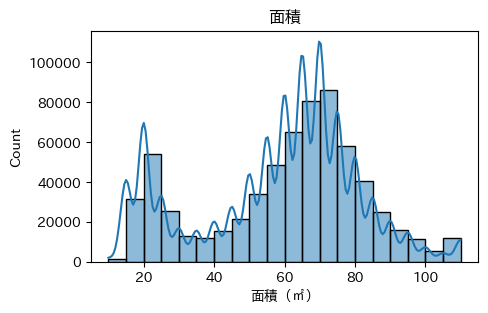

In [77]:
fig = plt.figure(figsize=(5,3))
ax1 = fig.add_subplot(111)
sns.histplot(all_df['面積（㎡）'],bins=20,kde=True,ax=ax1)
ax1.set_title('面積')
plt.show()

100%|██████████| 11/11 [00:02<00:00,  4.93it/s]


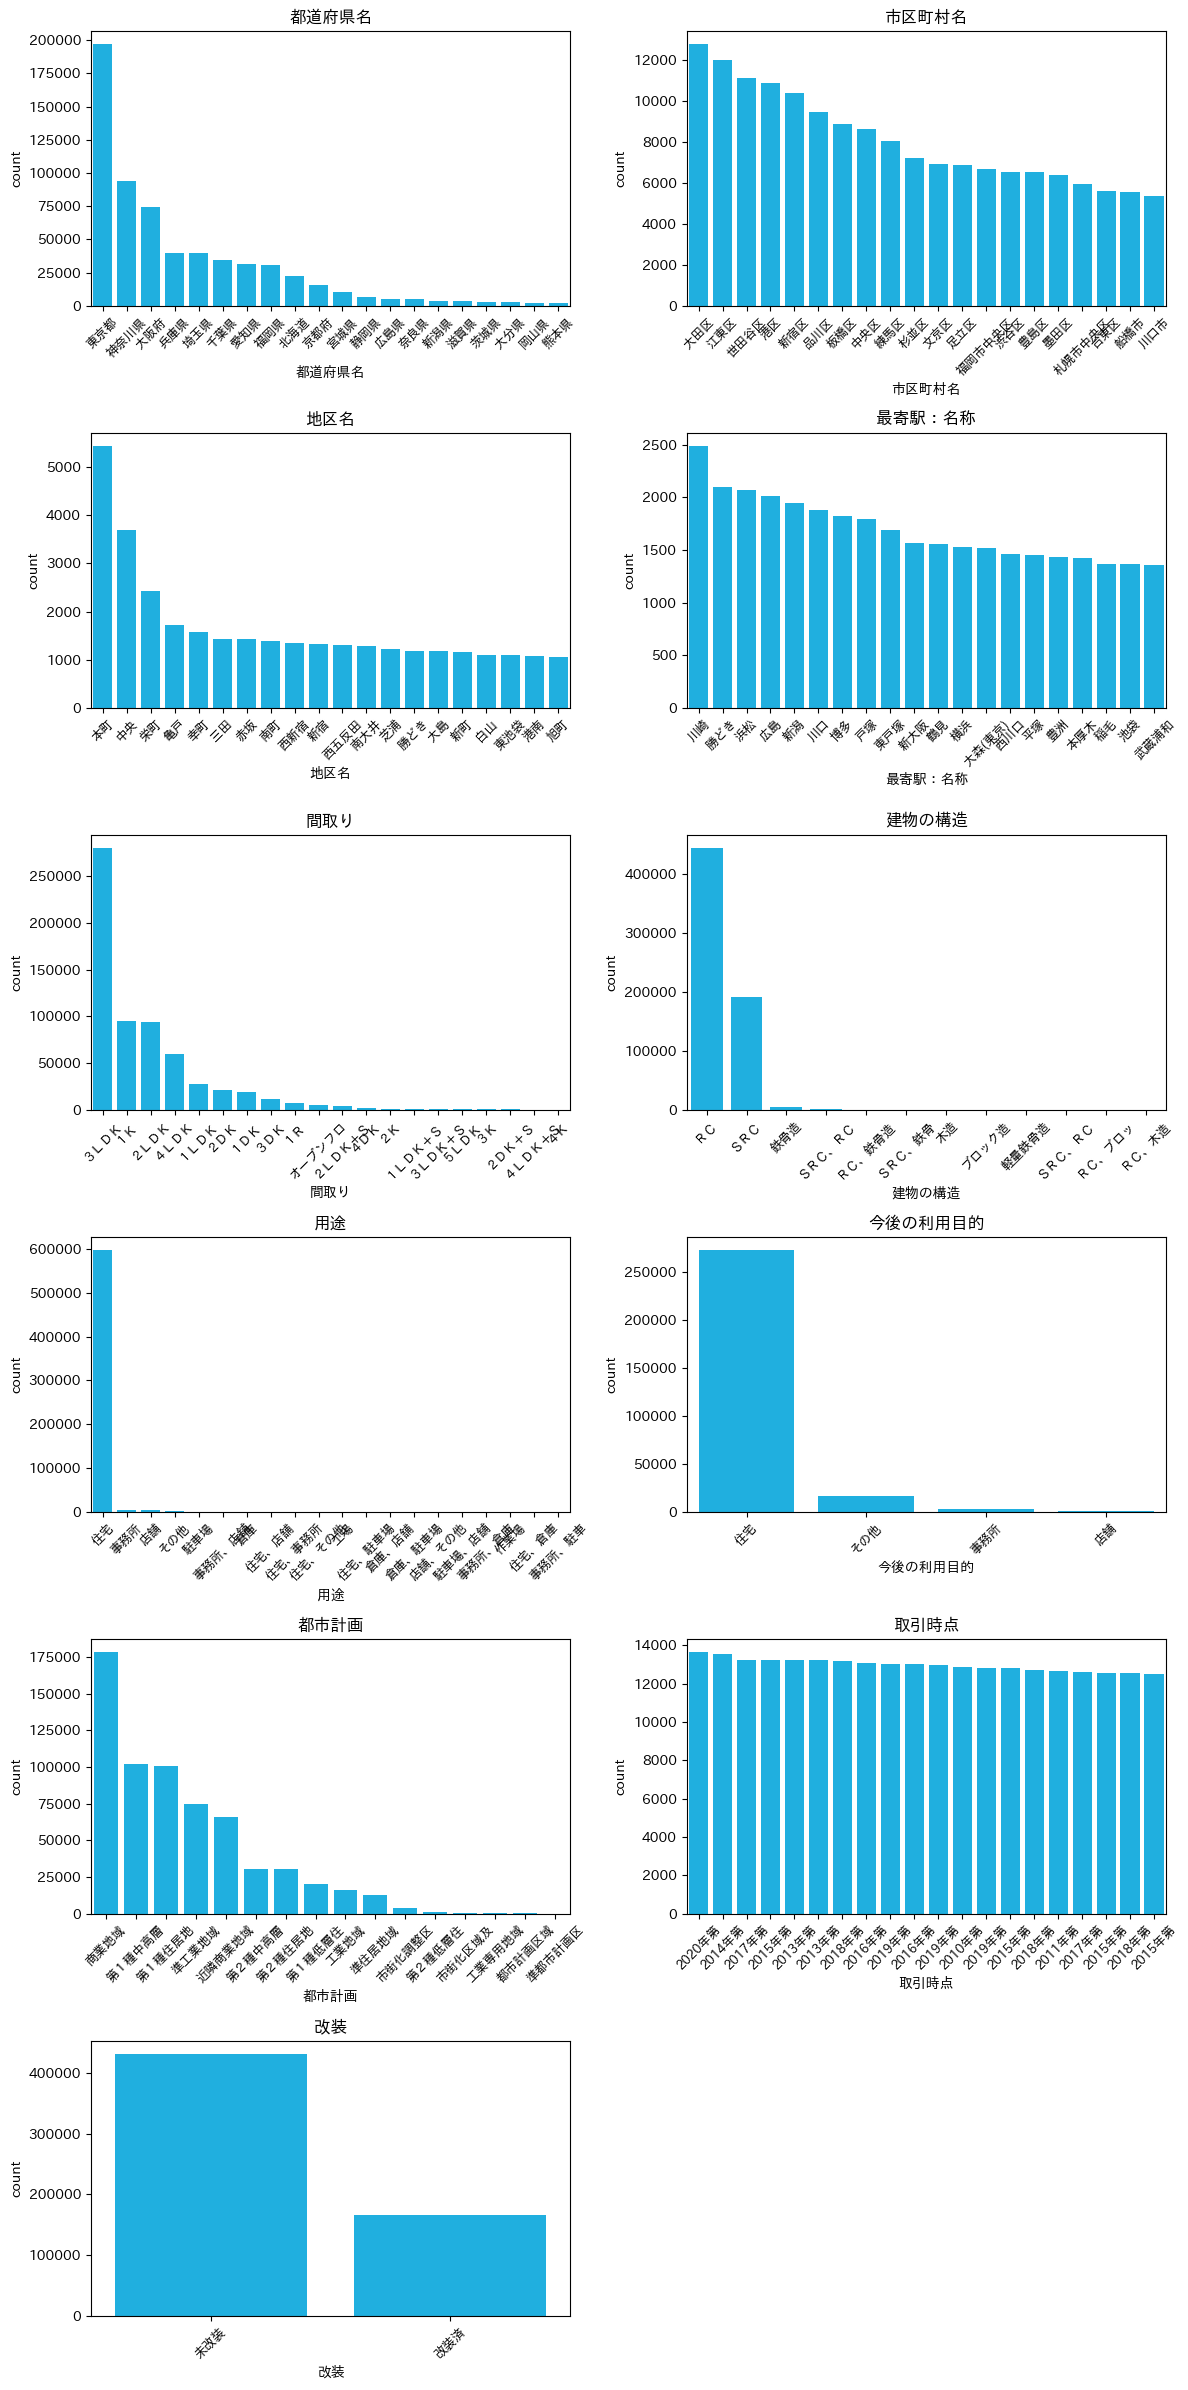

In [97]:
plt.figure(figsize=(12,24))

for i,col in enumerate(tqdm(qualitative)):
  types = all_df[col].value_counts()[:20]
  types.index = [x for x in types.index]

  plt.subplot(int(len(qualitative)/2)+1, 2, i+1)
  ax = sns.countplot(x=col,data=all_df,order=types.index.values,color='deepskyblue')
  ax.set_title(col)
  xlabels = [label[:6] for label in types.index]
  ax.set_xticklabels(xlabels,rotation=45,fontsize=9)

plt.tight_layout()
plt.show()

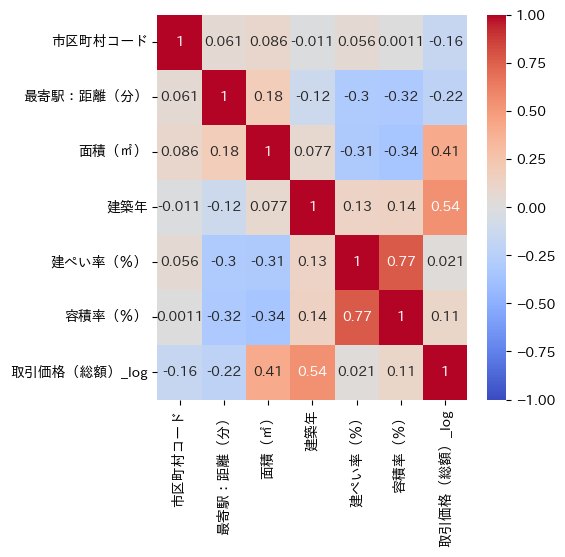

In [101]:
plt.figure(figsize=(5,5))
sns.heatmap(all_df[quantitative].corr(),annot=True,cmap='coolwarm',vmin=-1)
plt.show()

In [102]:
train_df = all_df[all_df['isTest'] == 0].drop('isTest',axis=1)
test_df = all_df[all_df['isTest'] == 1].drop('isTest',axis=1)

In [103]:
train_df.to_csv(f"{PROCESSED_DATA_DIR}01_EDA_preprocessed_train.csv",index=False)
test_df.to_csv(f"{PROCESSED_DATA_DIR}01_EDA_preprocessed_test.csv",index=False)